In [2094]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.colors as mcolors
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
import matplotlib.ticker as mticker

In [1893]:
warnings.filterwarnings("ignore")

In [1894]:
df = pd.read_csv("bike_sharing.txt")

### 1. Dataset analysis

In [1895]:
df.shape

(10886, 12)

In [1896]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [1897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [1898]:
# Mising value analysis
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 2. Dataset modification for analysis purpose

In [1899]:
#Convert relevant columns to appropriate data types: "datetime" to datetime, and "season," "holiday," "workingday," and "weather" to object types for categorical use.
df["datetime"] = pd.to_datetime(df["datetime"])
df["season"] = df["season"].astype("object")
df["holiday"] = df["holiday"].astype("object")
df["workingday"] = df["workingday"].astype("object")
df["weather"] = df["weather"].astype("object")

In [1900]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [1901]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [1902]:
#Insert a new column 'season_cat' after the 'season' column with mapped season names.
df.insert(df.columns.get_loc("season")+1, 'season_cat', df["season"].map({
    1: "Spring", 
    2: "Summer", 
    3: "Fall", 
    4: "Winter"
}))

In [1903]:
#Insert a 'holiday_cat' column after 'holiday' to categorize holiday status.
df.insert(df.columns.get_loc("holiday")+1, 'holiday_cat', df["holiday"].map({
    1: "Holiday", 
    0: "Not Holiday"
}))

In [1904]:
#Insert 'workingday_cat' after 'workingday' to categorize working day status.
df.insert(df.columns.get_loc("workingday")+1, 'workingday_cat', df["workingday"].map({
    1: "Working Day", 
    0: "Non Working Day"
}))

In [1905]:
#Insert 'weather_cat' after 'weather' to categorize weather conditions.
df.insert(df.columns.get_loc("weather")+1, 'weather_cat', df["weather"].map({
    1: "Clear",
    2: "Misty",
    3: "Light Precipitation",
    4: "Heavy Precipitation"
}))

In [1906]:
#Add new columns "quarter," "year," "month_name," "month," "day_name," and "day" to the DataFrame based on the "datetime" column's date components.

df.insert(df.columns.get_loc("datetime")+1, "quarter", df["datetime"].dt.quarter.map({
    1:"Q1",
    2:"Q2",
    3:"Q3",
    4:"Q4",
}))
df.insert(df.columns.get_loc("datetime")+1, "year", df["datetime"].dt.year.astype("object"))
df.insert(df.columns.get_loc("datetime")+1, "month_name", df["datetime"].dt.month_name())
df.insert(df.columns.get_loc("datetime")+1, "month", df["datetime"].dt.month.astype("object"))
df.insert(df.columns.get_loc("datetime")+1, "day_name", df["datetime"].dt.day_name())
df.insert(df.columns.get_loc("datetime")+1, "day", df["datetime"].dt.day.astype("object"))

In [1907]:
#Print unique values for each categorical column: "season_cat," "holiday_cat," "workingday_cat," and "weather_cat."

print(df["season_cat"].unique())
print(df["holiday_cat"].unique())
print(df["workingday_cat"].unique())
print(df["weather_cat"].unique())

['Spring' 'Summer' 'Fall' 'Winter']
['Not Holiday' 'Holiday']
['Non Working Day' 'Working Day']
['Clear' 'Misty' 'Light Precipitation' 'Heavy Precipitation']


In [1908]:
#Print unique values for each of the added columns: "quarter," "year," "month_name," "month," "day_name," and "day."

print(df["quarter"].unique())
print(df["year"].unique())
print(df["month_name"].unique())
print(df["month"].unique())
print(df["day_name"].unique())
print(df["day"].unique())

['Q1' 'Q2' 'Q3' 'Q4']
[2011 2012]
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
[1 2 3 4 5 6 7 8 9 10 11 12]
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19]


In [1909]:
df.head()

,datetime,day,day_name,month,month_name,year,quarter,season,season_cat,holiday,...,workingday_cat,weather,weather_cat,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,Saturday,1,January,2011,Q1,1,Spring,0,...,Non Working Day,1,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,Saturday,1,January,2011,Q1,1,Spring,0,...,Non Working Day,1,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,Saturday,1,January,2011,Q1,1,Spring,0,...,Non Working Day,1,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,Saturday,1,January,2011,Q1,1,Spring,0,...,Non Working Day,1,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,Saturday,1,January,2011,Q1,1,Spring,0,...,Non Working Day,1,Clear,9.84,14.395,75,0.0,0,1,1


In [1910]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        10886 non-null  datetime64[ns]
 1   day             10886 non-null  object        
 2   day_name        10886 non-null  object        
 3   month           10886 non-null  object        
 4   month_name      10886 non-null  object        
 5   year            10886 non-null  object        
 6   quarter         10886 non-null  object        
 7   season          10886 non-null  object        
 8   season_cat      10886 non-null  object        
 9   holiday         10886 non-null  object        
 10  holiday_cat     10886 non-null  object        
 11  workingday      10886 non-null  object        
 12  workingday_cat  10886 non-null  object        
 13  weather         10886 non-null  object        
 14  weather_cat     10886 non-null  object        
 15  te

### 3. Dataset statistical overview

In [1911]:
#Generate descriptive statistics for the DataFrame.
df.describe().round(2)

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,41.00,45.46,100.00,57.00,367.00,886.00,977.00


In [1912]:
#Generate summary statistics for object-type columns in the DataFrame.
df.describe(include="object")

,day,day_name,month,month_name,year,quarter,season,season_cat,holiday,holiday_cat,workingday,workingday_cat,weather,weather_cat
count,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886
unique,19,7,12,12,2,4,4,4,2,2,2,2,4,4
top,1,Saturday,5,May,2012,Q4,4,Winter,0,Not Holiday,1,Working Day,1,Clear
freq,575,1584,912,912,5464,2734,2734,2734,10575,10575,7412,7412,7192,7192


### 4. Graphical & Non-graphical Univariate Analysis

In [1913]:
'''
    Returns a DataFrame containing value counts for a specified column in the input DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to analyze.
    - col_name (str): The name of the column for which value counts are computed.

    Returns:
    - pandas.DataFrame: A DataFrame with three columns: "Parameter Name," "Parameter Value," and "Parameter Value Count."
      Each row represents a unique value in the specified column along with its count.
'''
def get_value_count_df(df, col_name):
    param = []
    param_val = []
    param_val_count = []

    #t_data = df[col_name].value_counts().reset_index()
    t_data = df.groupby(col_name)["count"].sum().reset_index()
    for i in range(t_data.shape[0]):
        param.append(col_name)
        param_val.append(t_data.iloc[i]["count"])
        param_val_count.append(t_data.iloc[i][col_name])

    val_count_dt = pd.DataFrame(
        {
            "Parameter Name" : param,
            "Parameter Value" : param_val_count,
            "Parameter Value Count" : param_val
        }
    )

    return val_count_dt

In [1914]:
#Define a custom color palette for plotting.
plot_palette = ["#7FAFD6", "#3B7CA7", "#8AC3E6", "#808080", "#E6D1B1", "#FFE599", "#0073AD", "#C0C0C0", "#DAA520", "#45608E", "#FFA07A" ]

In [1915]:
#Count occurrences of each unique value in the "day_name" column of the DataFrame df.
df_t = get_value_count_df(df,"day_name")
df_t

,Parameter Name,Parameter Value,Parameter Value Count
0,day_name,Friday,302504
1,day_name,Monday,295296
2,day_name,Saturday,311518
3,day_name,Sunday,285546
4,day_name,Thursday,306401
5,day_name,Tuesday,291985
6,day_name,Wednesday,292226


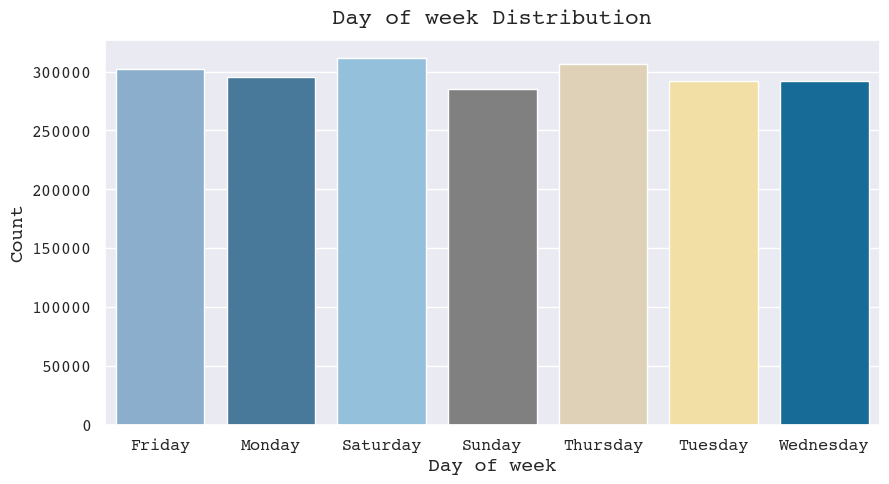

In [1916]:
# Create a countplot for the distribution of days of the week.
fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x ="Parameter Value", y="Parameter Value Count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Day of week", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Day of week Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1917]:
# Get the count of unique values in the 'month_name' column of the DataFrame 'df'.
df_t = get_value_count_df(df,"month_name")
df_t

,Parameter Name,Parameter Value,Parameter Value Count
0,month_name,April,167402
1,month_name,August,213516
2,month_name,December,160160
3,month_name,February,99113
4,month_name,January,79884
5,month_name,July,214617
6,month_name,June,220733
7,month_name,March,133501
8,month_name,May,200147
9,month_name,November,176440


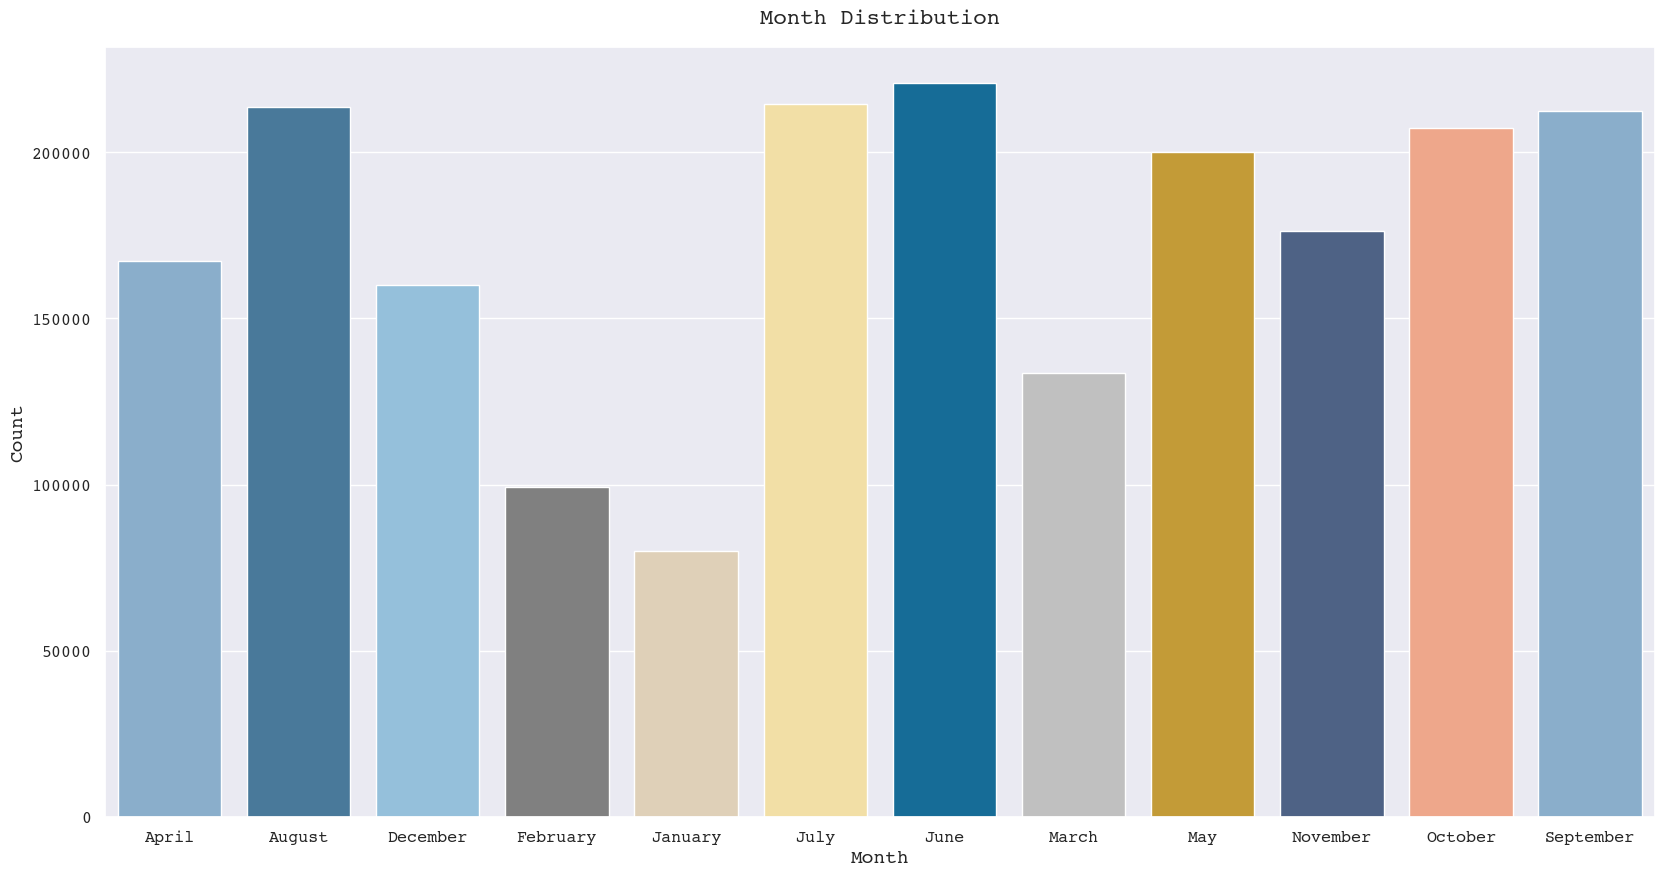

In [1918]:
# Create a countplot to visualize the distribution of months.
fig=plt.figure(figsize=(20,10))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x ="Parameter Value", y="Parameter Value Count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Month", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Month Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1919]:
# Count the occurrences of unique values in the 'year' column of the DataFrame 'df'.
df_t = get_value_count_df(df,"year")
df_t

,Parameter Name,Parameter Value,Parameter Value Count
0,year,2011,781979
1,year,2012,1303497


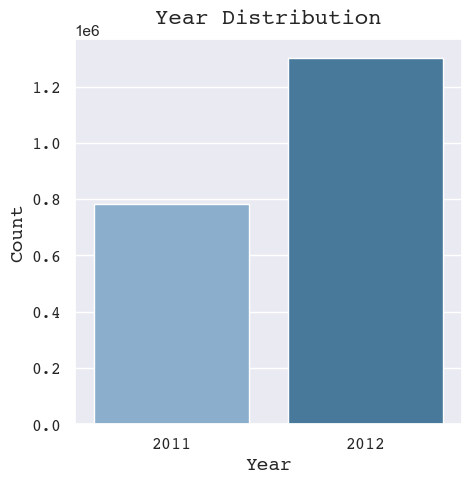

In [1920]:
# Create a countplot to visualize the distribution of year.
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x ="Parameter Value", y="Parameter Value Count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Year", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Year Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1921]:
#Count occurrences of each unique value in the "quarter" column of the DataFrame df.
df_t = get_value_count_df(df,"quarter")
df_t

,Parameter Name,Parameter Value,Parameter Value Count
0,quarter,Q1,312498
1,quarter,Q2,588282
2,quarter,Q3,640662
3,quarter,Q4,544034


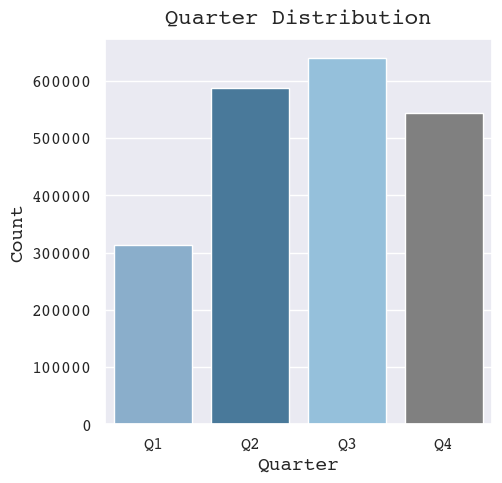

In [1922]:
# Create a countplot to visualize the distribution of quarter.
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x ="Parameter Value", y="Parameter Value Count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Quarter", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Quarter Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1923]:
#Count occurrences of each unique value in the "season_cat" column of the DataFrame df.
df_t = get_value_count_df(df,"season_cat")
df_t

,Parameter Name,Parameter Value,Parameter Value Count
0,season_cat,Fall,640662
1,season_cat,Spring,312498
2,season_cat,Summer,588282
3,season_cat,Winter,544034


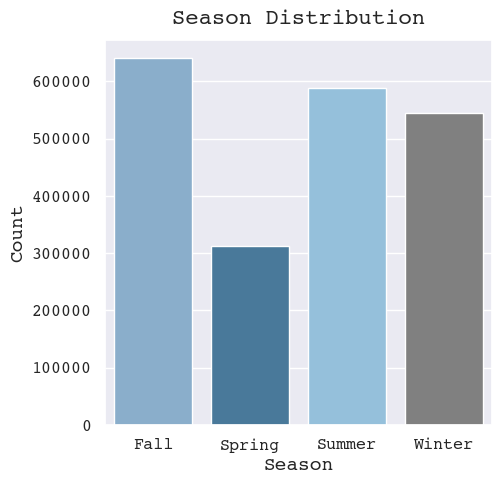

In [1924]:
# Create a countplot to visualize the distribution of seasons.
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x ="Parameter Value", y="Parameter Value Count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Season", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Season Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1925]:
#Count occurrences of each unique value in the "holiday_cat" column of the DataFrame df.
df_t = get_value_count_df(df,"holiday_cat")
df_t

,Parameter Name,Parameter Value,Parameter Value Count
0,holiday_cat,Holiday,57808
1,holiday_cat,Not Holiday,2027668


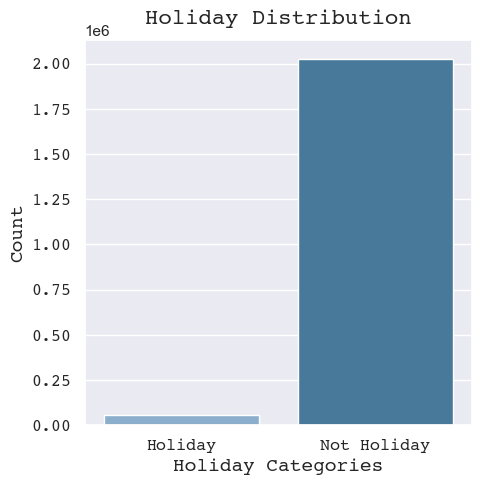

In [1926]:
# Create a countplot to visualize the distribution of holiday categories.
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x ="Parameter Value", y="Parameter Value Count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Holiday Categories", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Holiday Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [2010]:
#Count occurrences of each unique value in the "workingday_cat" column of the DataFrame df.
df_t = get_value_count_df(df,"workingday_cat")
df_t

,Parameter Name,Parameter Value,Parameter Value Count
0,workingday_cat,Non Working Day,654872
1,workingday_cat,Working Day,1430604


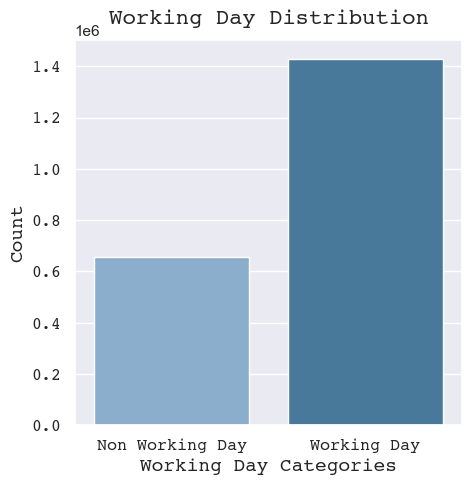

In [2011]:
# Create a countplot to visualize the distribution of working day categories.
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x ="Parameter Value", y="Parameter Value Count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Working Day Categories", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Working Day Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1929]:
#Count occurrences of each unique value in the "weather_cat" column of the DataFrame df.
df_t = get_value_count_df(df,"weather_cat")
df_t

,Parameter Name,Parameter Value,Parameter Value Count
0,weather_cat,Clear,1476063
1,weather_cat,Heavy Precipitation,164
2,weather_cat,Light Precipitation,102089
3,weather_cat,Misty,507160


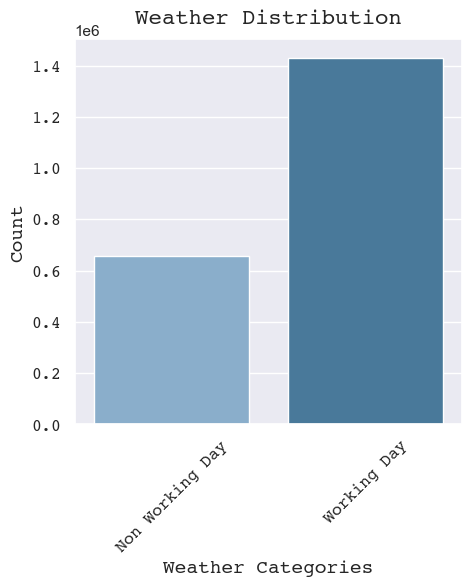

In [2013]:
# Create a countplot to visualize the distribution weather.
fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x ="Parameter Value", y="Parameter Value Count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier', rotation=45)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Weather Categories", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Weather Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1931]:
# Create temperature bins and count the occurrences in each bin

data_t = pd.DataFrame(df[["temp","count"]])

min_temp = np.floor(data_t['temp'].min())
max_temp = np.ceil(data_t['temp'].max())

bin_width = 5

bin_edges = np.arange(min_temp, max_temp + bin_width, bin_width)
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

data_t['bins'] = pd.cut(data_t['temp'], bins=bin_edges, labels=bin_labels)
data_t = data_t.groupby("bins")["count"].sum().reset_index().rename(columns={"bins":"Temprature Range"})
data_t

,Temprature Range,count
0,0-5,6871
1,5-10,85270
2,10-15,281255
3,15-20,327978
4,20-25,436728
5,25-30,531537
6,30-35,351600
7,35-40,63943
8,40-45,294


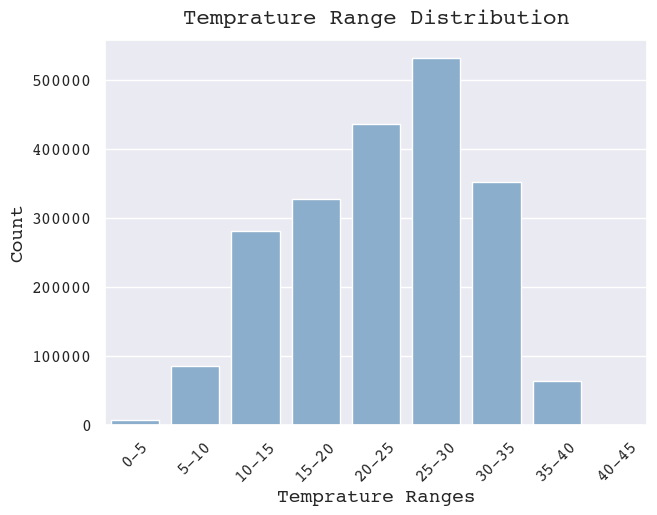

In [1932]:
# Create a countplot to visualize the distribution weather.
fig=plt.figure(figsize=(7,5))
sns.set(style = 'darkgrid')
sns.barplot(data=data_t, x ="Temprature Range", y="count", color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation=45)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Temprature Ranges", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Temprature Range Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1933]:
# Create felt temperature bins and count the occurrences in each bin

data_t = pd.DataFrame(df[["atemp","count"]])

min_temp = np.floor(data_t['atemp'].min())
max_temp = np.ceil(data_t['atemp'].max())

bin_width = 5

bin_edges = np.arange(min_temp, max_temp + bin_width, bin_width)
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

data_t['bins'] = pd.cut(data_t['atemp'], bins=bin_edges, labels=bin_labels)
data_t = data_t.groupby("bins")["count"].sum().reset_index().rename(columns={"bins":"Felt Temprature Range"})
data_t

,Felt Temprature Range,count
0,0-5,2199
1,5-10,36650
2,10-15,136252
3,15-20,251262
4,20-25,420302
5,25-30,290888
6,30-35,687504
7,35-40,212379
8,40-45,47728
9,45-50,312


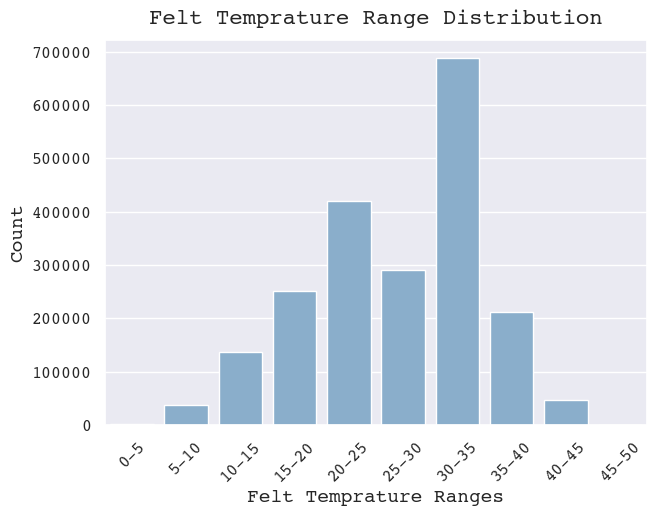

In [1934]:
# Create a countplot to visualize the distribution weather.
fig=plt.figure(figsize=(7,5))
sns.set(style = 'darkgrid')
sns.barplot(data=data_t, x ="Felt Temprature Range", y="count", color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation=45)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Felt Temprature Ranges", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Felt Temprature Range Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1935]:
# Create humidity bins and count the occurrences in each bin

data_t = pd.DataFrame(df[["humidity","count"]])

min_temp = np.floor(data_t['humidity'].min())
max_temp = np.ceil(data_t['humidity'].max())

bin_width = 10

bin_edges = np.arange(min_temp, max_temp + bin_width, bin_width)
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

data_t['bins'] = pd.cut(data_t['humidity'], bins=bin_edges, labels=bin_labels)
data_t = data_t.groupby("bins")["count"].sum().reset_index().rename(columns={"bins":"Humidity Range"})
data_t


,Humidity Range,count
0,0-10,184
1,10-20,13263
2,20-30,123930
3,30-40,329482
4,40-50,409995
5,50-60,376022
6,60-70,344254
7,70-80,235001
8,80-90,199223
9,90-100,53499


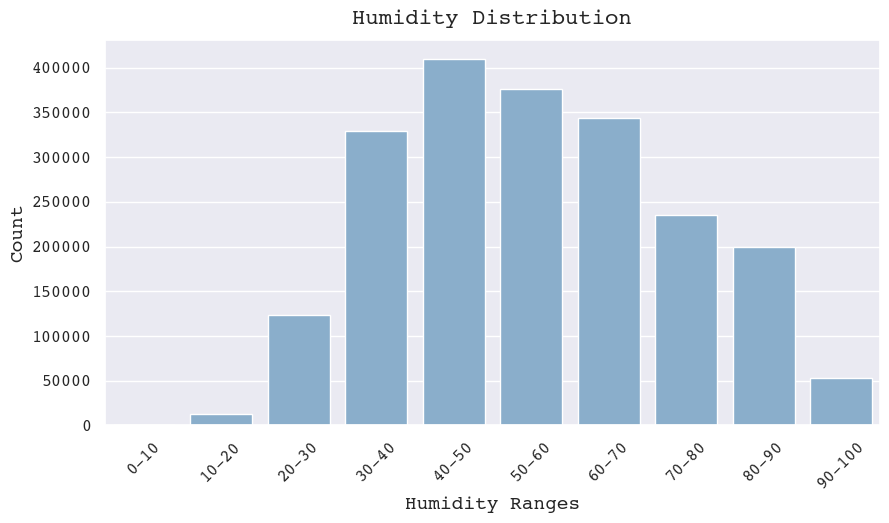

In [1936]:
# Create a countplot to visualize the distribution humidity.
fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
sns.barplot(data=data_t, x ="Humidity Range", y="count", color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation = 45)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Humidity Ranges", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Humidity Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [1937]:
# Create windspeed bins and count the occurrences in each bin

data_t = pd.DataFrame(df[["windspeed","count"]])

min_temp = np.floor(data_t['windspeed'].min())
max_temp = np.ceil(data_t['windspeed'].max())

bin_width = 5

bin_edges = np.arange(min_temp, max_temp + bin_width, bin_width)
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

data_t['bins'] = pd.cut(data_t['windspeed'], bins=bin_edges, labels=bin_labels)

data_t = data_t.groupby("bins")["count"].sum().reset_index().rename(columns={"bins":"Wind Speed Range"})
data_t

,Wind Speed Range,count
0,0-5,0
1,5-10,501288
2,10-15,424535
3,15-20,637864
4,20-25,129123
5,25-30,94776
6,30-35,57429
7,35-40,22460
8,40-45,5277
9,45-50,483


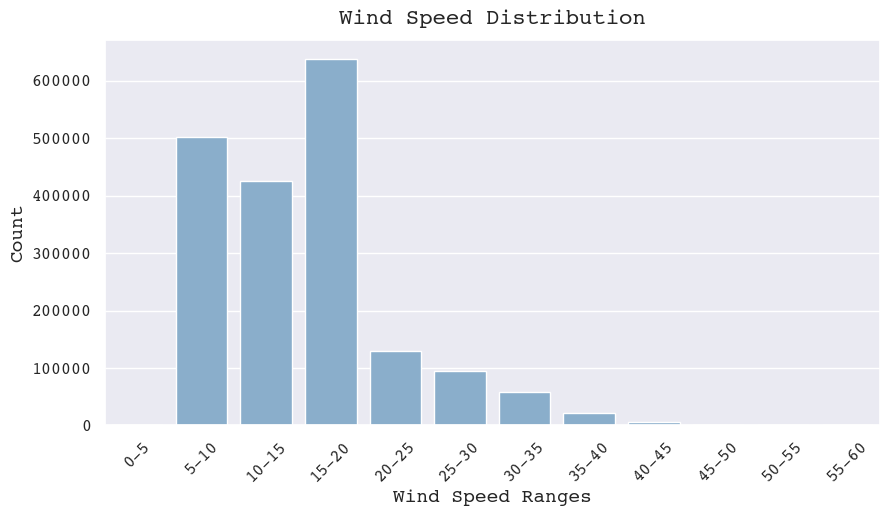

In [1938]:
# Create a countplot to visualize the distribution wind speed.
fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
sns.barplot(data=data_t, x ="Wind Speed Range", y="count", color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation = 45)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Wind Speed Ranges", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Wind Speed Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

### 5. Graphical & Non-graphical Bivariate Analysis

In [1939]:
# Reshaping the DataFrame to long format for user type counts by day.

df_t = df[["day_name","casual", "registered"]].melt(id_vars=["day_name"], var_name='user_type', value_name='user_count')
df_t = df_t.groupby(["user_type","day_name"])["user_count"].sum().reset_index().sort_values("day_name").reset_index(drop=True)
df_t

,user_type,day_name,user_count
0,casual,Friday,47402
1,registered,Friday,255102
2,casual,Monday,46288
3,registered,Monday,249008
4,casual,Saturday,100782
5,registered,Saturday,210736
6,casual,Sunday,90084
7,registered,Sunday,195462
8,casual,Thursday,37283
9,registered,Thursday,269118


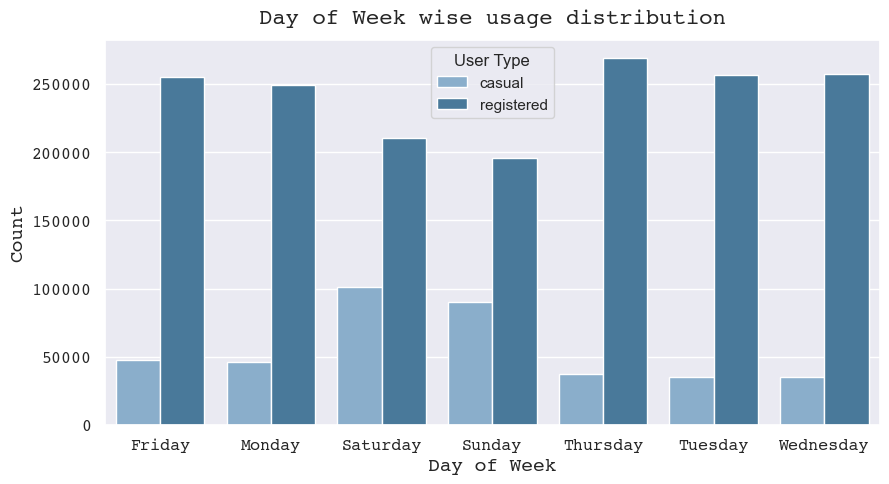

In [1940]:
# Create a bar plot of user counts by day of the week and user type, with custom styling and labels.

fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x="day_name", y="user_count", hue="user_type", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Day of Week", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Day of Week wise usage distribution", y=1.02, fontsize = 16, fontname='Courier')
ax.legend(title="User Type")
plt.show()

In [1941]:
# Reshaping the DataFrame to long format for user type counts by month.

df_t = df[["month_name","casual", "registered"]].melt(id_vars=["month_name"], var_name='user_type', value_name='user_count')
df_t = df_t.groupby(["user_type","month_name"])["user_count"].sum().reset_index().sort_values("month_name").reset_index(drop=True)
df_t

,user_type,month_name,user_count
0,casual,April,39813
1,registered,April,127589
2,casual,August,45870
3,registered,August,167646
4,casual,December,14700
5,registered,December,145460
6,casual,February,9297
7,registered,February,89816
8,casual,January,7252
9,registered,January,72632


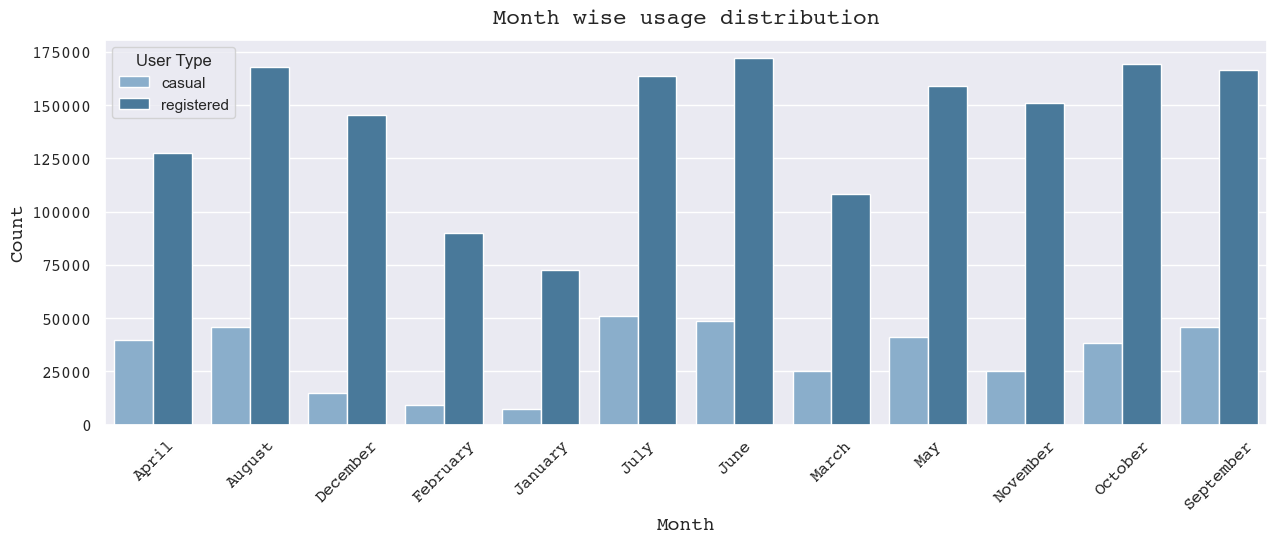

In [1942]:
# Create a barplot to visualize month-wise user counts by user type.

fig=plt.figure(figsize=(15,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x="month_name", y="user_count", hue="user_type", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier', rotation=45)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Month", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Month wise usage distribution", y=1.02, fontsize = 16, fontname='Courier')
ax.legend(title="User Type")
plt.show()

In [2014]:
# Reshaping the DataFrame to a tidy format for user-type counts by year.

df_t = df[["year","casual", "registered"]].melt(id_vars=["year"], var_name='user_type', value_name='user_count')
df_t = df_t.groupby(["user_type","year"])["user_count"].sum().reset_index().sort_values("year").reset_index(drop=True)
df_t

,user_type,year,user_count
0,casual,2011,155817
1,registered,2011,626162
2,casual,2012,236318
3,registered,2012,1067179


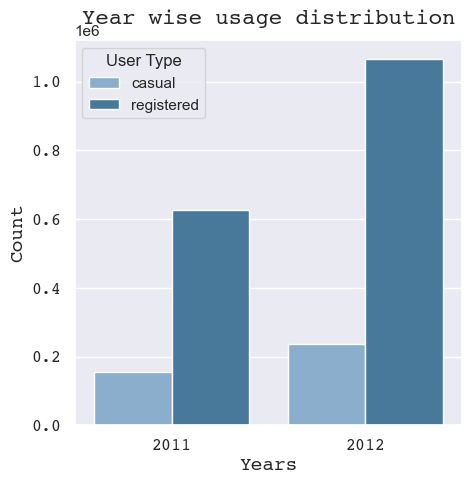

In [1944]:
# Create a barplot to visualize year-wise usage distribution by user type using Seaborn and customize the plot aesthetics.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x="year", y="user_count", hue="user_type", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Years", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Year wise usage distribution", y=1.02, fontsize = 16, fontname='Courier')
ax.legend(title="User Type")
plt.show()

In [1945]:
# Reshaping dataframe to convert user types into rows for analysis.

df_t = df[["quarter","casual", "registered"]].melt(id_vars=["quarter"], var_name='user_type', value_name='user_count')
df_t = df_t.groupby(["user_type","quarter"])["user_count"].sum().reset_index().sort_values("quarter").reset_index(drop=True)
df_t

,user_type,quarter,user_count
0,casual,Q1,41605
1,registered,Q1,270893
2,casual,Q2,129672
3,registered,Q2,458610
4,casual,Q3,142718
5,registered,Q3,497944
6,casual,Q4,78140
7,registered,Q4,465894


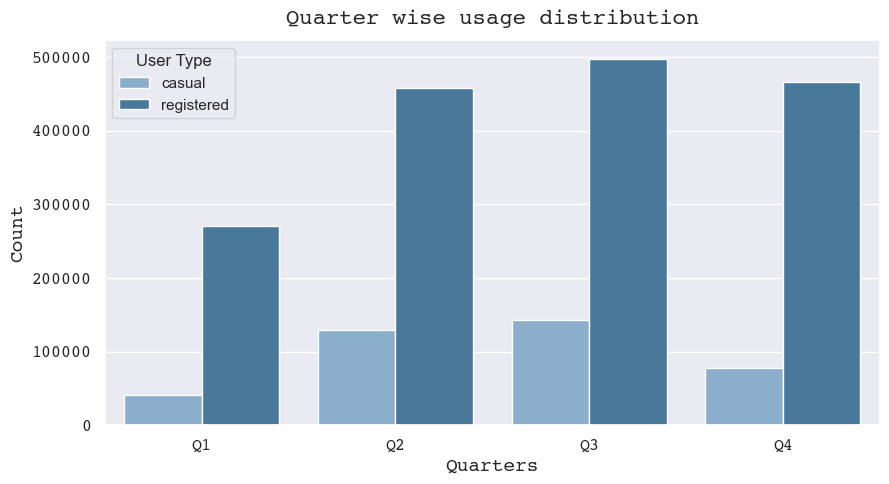

In [1946]:
# Create a bar plot of quarterly user counts by user type with customized styling and labels.

fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x="quarter", y="user_count", hue="user_type", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Quarters", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Quarter wise usage distribution", y=1.02, fontsize = 16, fontname='Courier')
ax.legend(title="User Type")
plt.show()

In [1947]:
# Reshaping DataFrame df by melting user counts for each user type in the 'season_cat' column.

df_t = df[["season_cat","casual", "registered"]].melt(id_vars=["season_cat"], var_name='user_type', value_name='user_count')
df_t = df_t.groupby(["user_type","season_cat"])["user_count"].sum().reset_index().sort_values("season_cat").reset_index(drop=True)
df_t

,user_type,season_cat,user_count
0,casual,Fall,142718
1,registered,Fall,497944
2,casual,Spring,41605
3,registered,Spring,270893
4,casual,Summer,129672
5,registered,Summer,458610
6,casual,Winter,78140
7,registered,Winter,465894


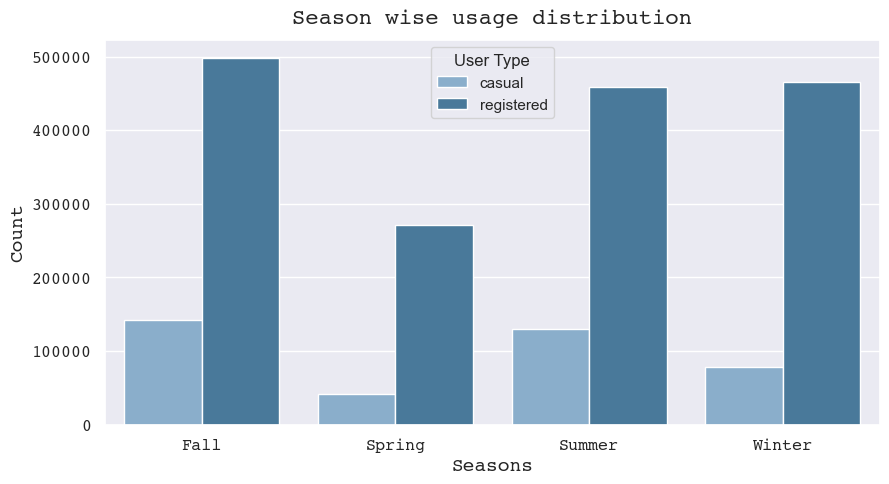

In [1948]:
# Create a bar plot to visualize season-wise usage distribution by user type with customized styling.

fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x="season_cat", y="user_count", hue="user_type", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Seasons", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Season wise usage distribution", y=1.02, fontsize = 16, fontname='Courier')
ax.legend(title="User Type")
plt.show()

In [1949]:
# Reshaping DataFrame to melt user counts for different user types under 'holiday_cat' column.

df_t = df[["holiday_cat","casual", "registered"]].melt(id_vars=["holiday_cat"], var_name='user_type', value_name='user_count')
df_t = df_t.groupby(["user_type","holiday_cat"])["user_count"].sum().reset_index().sort_values("holiday_cat").reset_index(drop=True)
df_t

,user_type,holiday_cat,user_count
0,casual,Holiday,15171
1,registered,Holiday,42637
2,casual,Not Holiday,376964
3,registered,Not Holiday,1650704


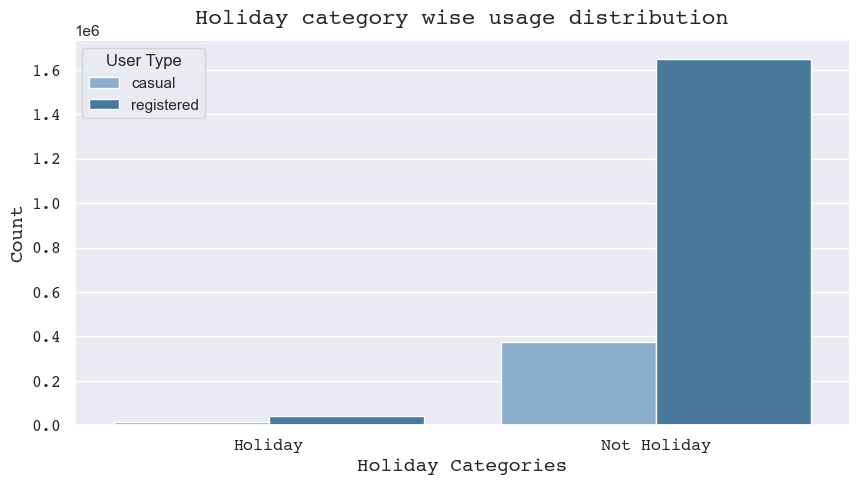

In [1950]:
# Create a bar plot to visualize holiday category wise usage distribution with user type differentiation.

fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x="holiday_cat", y="user_count", hue="user_type", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Holiday Categories", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Holiday category wise usage distribution", y=1.02, fontsize = 16, fontname='Courier')
ax.legend(title="User Type")
plt.show()

In [2016]:
# Reshaping the DataFrame to melt user counts for "casual" and "registered" by "workingday_cat"

df_t = df[["workingday_cat","casual", "registered"]].melt(id_vars=["workingday_cat"], var_name='user_type', value_name='user_count')
df_t = df_t.groupby(["user_type","workingday_cat"])["user_count"].sum().reset_index().sort_values("workingday_cat").reset_index(drop=True)
df_t

,user_type,workingday_cat,user_count
0,casual,Non Working Day,206037
1,registered,Non Working Day,448835
2,casual,Working Day,186098
3,registered,Working Day,1244506


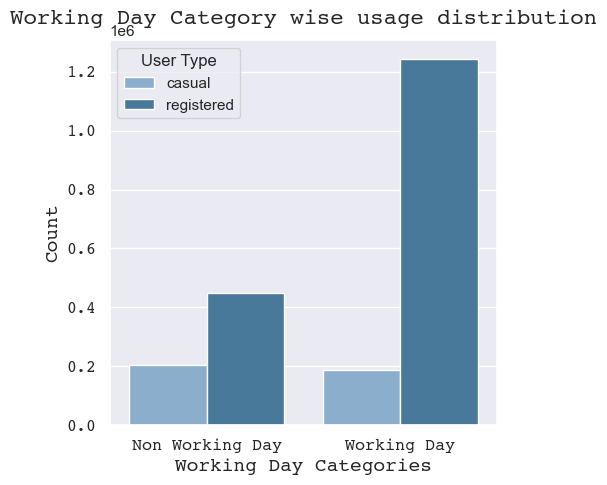

In [2017]:
# Create a barplot to visualize the distribution of user counts across working day categories and user types.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x="workingday_cat", y="user_count", hue="user_type", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Working Day Categories", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Working Day Category wise usage distribution", y=1.02, fontsize = 16, fontname='Courier')
ax.legend(title="User Type")
plt.show()

In [2019]:
# Reshaping DataFrame to analyze user counts by weather category and user type

df_t = df[["weather_cat","casual", "registered"]].melt(id_vars=["weather_cat"], var_name='user_type', value_name='user_count')
df_t = df_t.groupby(["user_type","weather_cat"])["user_count"].sum().reset_index().sort_values("weather_cat").reset_index(drop=True)
df_t

,user_type,weather_cat,user_count
0,casual,Clear,289900
1,registered,Clear,1186163
2,casual,Heavy Precipitation,6
3,registered,Heavy Precipitation,158
4,casual,Light Precipitation,14983
5,registered,Light Precipitation,87106
6,casual,Misty,87246
7,registered,Misty,419914


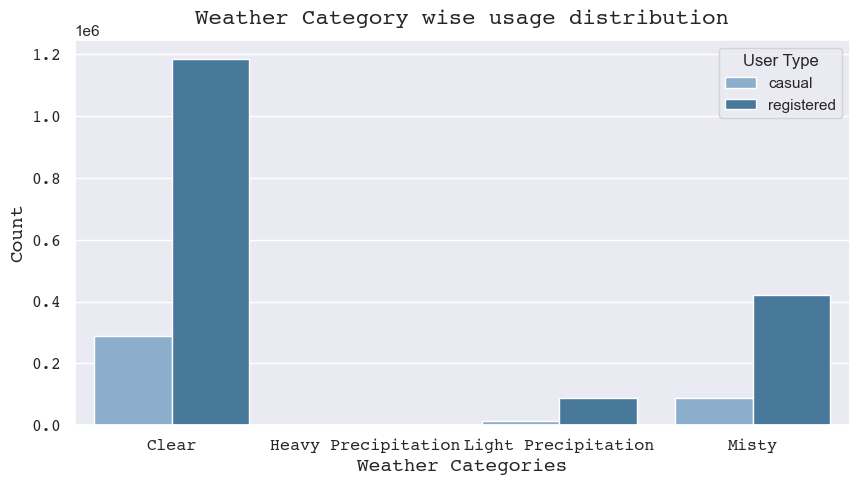

In [2020]:
# Create a barplot to visualize weather category-wise usage distribution with user type differentiation.

fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=df_t, x="weather_cat", y="user_count", hue="user_type", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Weather Categories", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Weather Category wise usage distribution", y=1.02, fontsize = 16, fontname='Courier')
ax.legend(title="User Type")
plt.show()

In [2022]:
df.groupby(["temp", "atemp", "humidity", "windspeed"])[["casual", "registered","count"]].sum().reset_index().corr().round(2)

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.00,0.98,-0.11,-0.04,0.48,0.28,0.35
atemp,0.98,1.00,-0.09,-0.08,0.48,0.29,0.36
humidity,-0.11,-0.09,1.00,-0.22,-0.15,0.03,-0.01
windspeed,-0.04,-0.08,-0.22,1.00,-0.09,-0.15,-0.15
casual,0.48,0.48,-0.15,-0.09,1.00,0.66,0.78
registered,0.28,0.29,0.03,-0.15,0.66,1.00,0.98
count,0.35,0.36,-0.01,-0.15,0.78,0.98,1.00


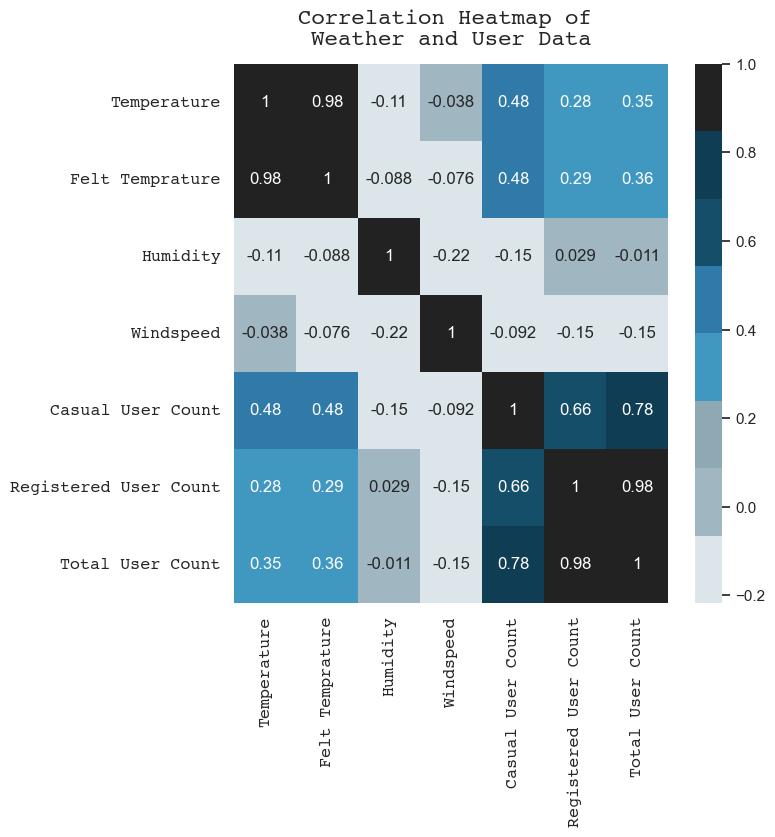

In [1955]:
custom_colors = ["#DCE5E9", "#A0B7C2", "#8EA9B3", "#4098C1", "#2F7AA9", "#144E69", "#0F3D53", "#222222"]
tick_labels = ["Temperature", "Felt Temprature", "Humidity", "Windspeed", "Casual User Count", "Registered User Count", "Total User Count"]
fig=plt.figure(figsize=(7,7))
ax = sns.heatmap(df.groupby(["temp", "atemp", "humidity", "windspeed"])[["casual", "registered","count"]].sum().reset_index().corr(), annot=True,
            cmap=mcolors.ListedColormap(custom_colors))
plt.xticks(fontsize = 12, fontname='Courier',rotation=90)
plt.yticks(fontsize = 12, fontname='Courier',rotation=0)

ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

plt.title("Correlation Heatmap of \nWeather and User Data", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

### 6. Outlier Detection

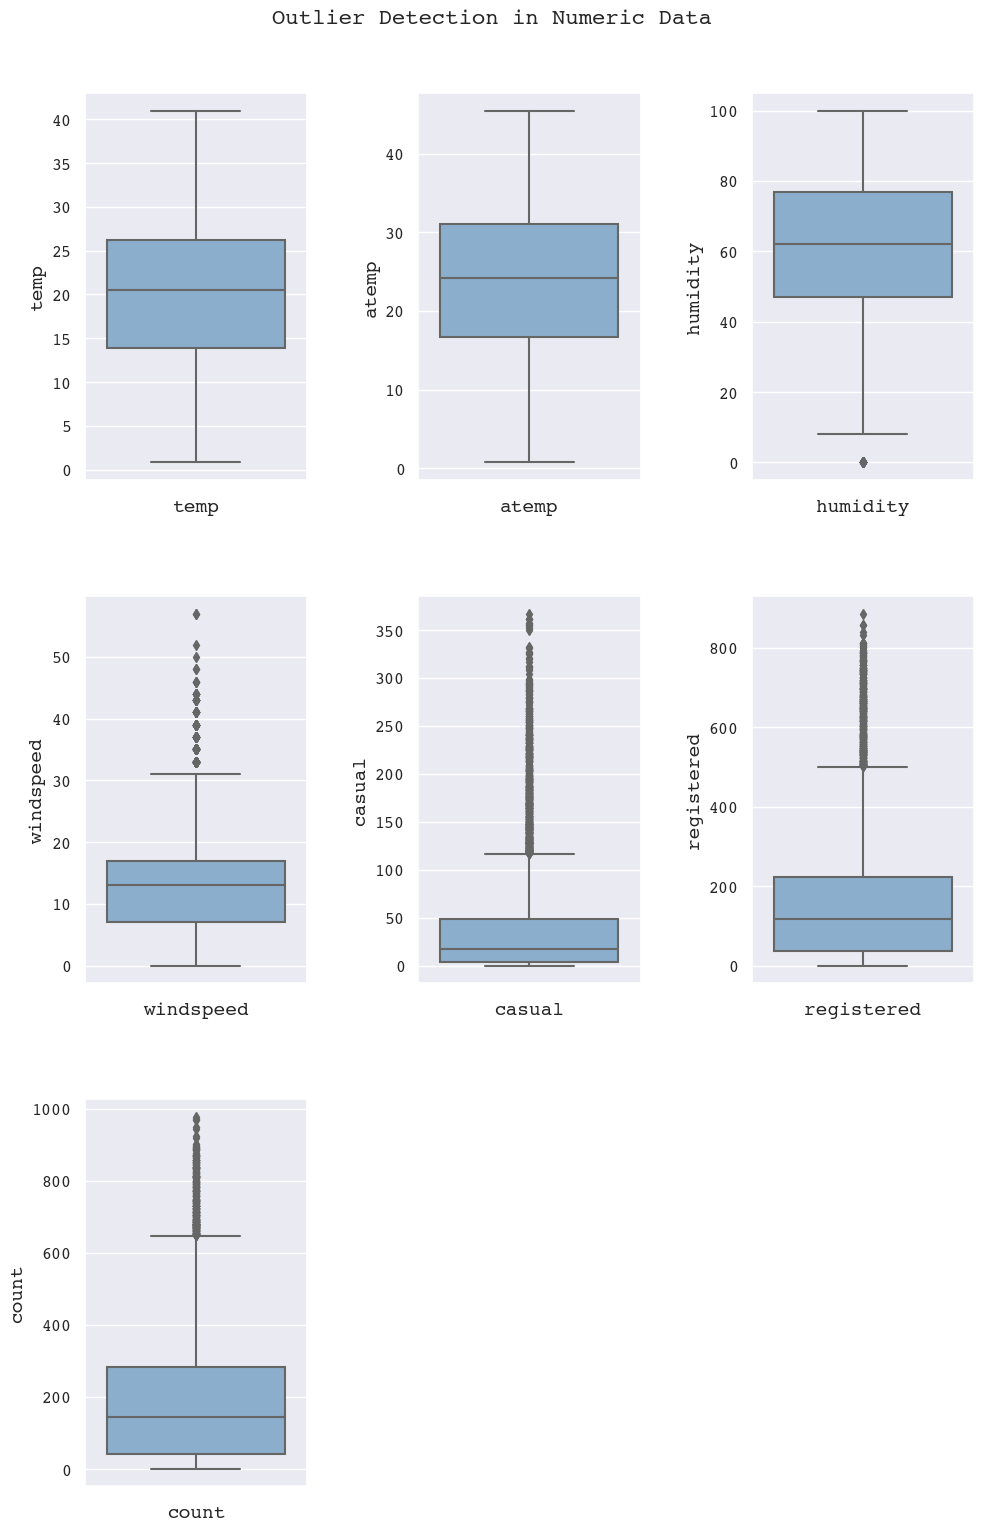

In [1956]:
# Create a subplot grid for outlier detection in numeric data using boxplots.

num_cols = df.select_dtypes(include='number').columns
fig=plt.figure(figsize=(10,15)).suptitle("Outlier Detection in Numeric Data", y=1.02, fontsize = 16, fontname='Courier')
for i in range(num_cols.size):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=num_cols[i], data=df, palette=plot_palette)
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel(num_cols[i], fontsize = 14, fontname='Courier')
    plt.ylabel(num_cols[i], fontsize = 14, fontname='Courier')
    #plt.title(num_cols[i], y=1.02, fontsize = 16, fontname='Courier')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace=0.5) 
plt.show()

### 7. Hypothesis Testing
##### Assumption
#####   - Significance level (alpha) = 5% = 0.05

In [1957]:
alpha=5/100

Working Day has effect on number of electric cycles rented
- Test to be used is two sample t-test. As numeric variable is to be compared with two categories (working & not working)
- Following t-test assumptions are to be validated
    - Data should follow normal distribution
    - There is equal variance within group
    - The data are continuous.
    - The sample data have been randomly sampled from a population.


In [1958]:
# Separate rentals into working day and non-working day categories.

workingday_rentals = df[df["workingday_cat"] == "Working Day"]["count"]
non_workingday_rentals = df[df["workingday_cat"] == "Non Working Day"]["count"]

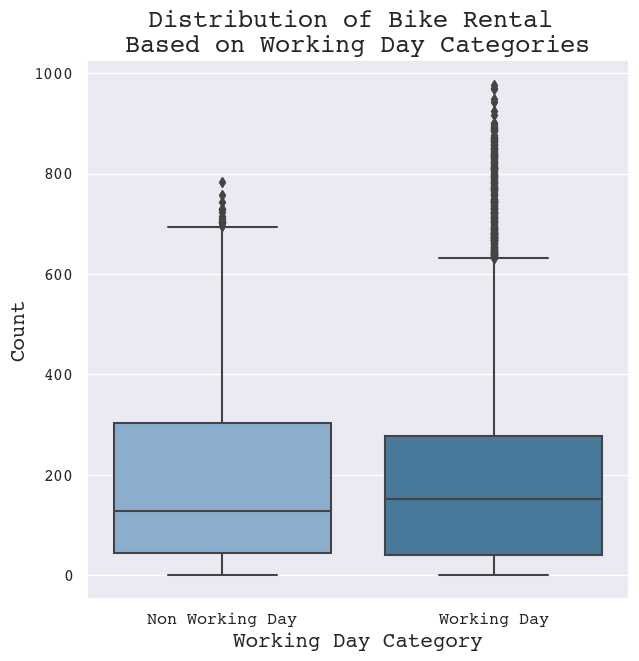

In [2073]:
fig=plt.figure(figsize=(7,7))
sns.set(style = 'darkgrid')
sns.boxplot(data=df, x="workingday_cat", y="count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Working Day Category", fontsize = 15, fontname='Courier')
plt.ylabel("Count", fontsize = 15, fontname='Courier')
plt.title("Distribution of Bike Rental \nBased on Working Day Categories", fontsize = 18, fontname='Courier')
plt.show()

<Figure size 500x500 with 0 Axes>

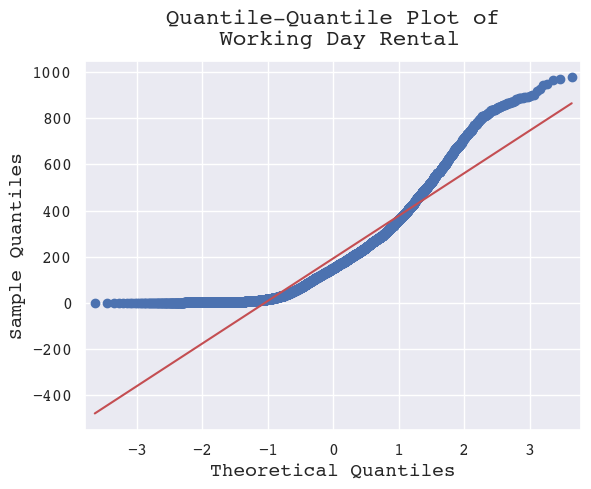

In [1959]:
# Create a Q-Q plot for working day rentals.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(workingday_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Working Day Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [2024]:
# Perform Shapiro-Wilk test to check if working day data follows a normal distribution and make a hypothesis decision.

H0 = "Working day data follows normal distribution"
Ha = "Working day data doesn't follow a normal distribution"

test_stat, p_value = shapiro(workingday_rentals.sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.8783320784568787 1.2829161344374285e-11
Reject H0,  Working day data doesn't follow a normal distribution


<Figure size 500x500 with 0 Axes>

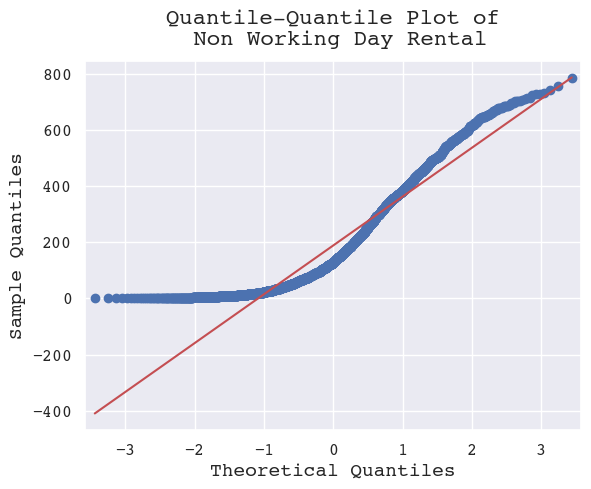

In [1961]:
# Create a Q-Q plot for non working day rentals.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(non_workingday_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Non Working Day Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1962]:
# Perform Shapiro-Wilk test to check if non working day data follows a normal distribution and make a hypothesis decision.

H0 = "Non working day data follows normal distribution"
Ha = "Non working day data doesn't follow a normal distribution"

test_stat, p_value = shapiro(non_workingday_rentals.sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.9001672267913818 2.5752619481345107e-10
Reject H0,  Non working day data doesn't follow a normal distribution


In [1963]:
#Check if the variance within groups is similar and determine hypothesis outcome.
H0 = "Variance within group is similar"
Ha = "Variance within group is not similar"

levene_stat, p_value = levene(
    non_workingday_rentals,
    workingday_rentals
)

print(test_stat, p_value)

if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.9001672267913818 0.9437823280916695
Fail to reject H0,  Variance within group is similar


In [2052]:
# Generate bootstrap samples and calculate means for working and non-working days.

num_samples = 500 

bootstrap_means_workingday = []
bootstrap_means_non_workingday = []

for i in range(num_samples):
    bootstrap_sample = np.random.choice(workingday_rentals, size=200, replace=True)
    bootstrap_means_workingday.append(np.mean(bootstrap_sample))

for i in range(num_samples):
    bootstrap_sample = np.random.choice(non_workingday_rentals, size=200, replace=True)
    bootstrap_means_non_workingday.append(np.mean(bootstrap_sample))


<Figure size 500x500 with 0 Axes>

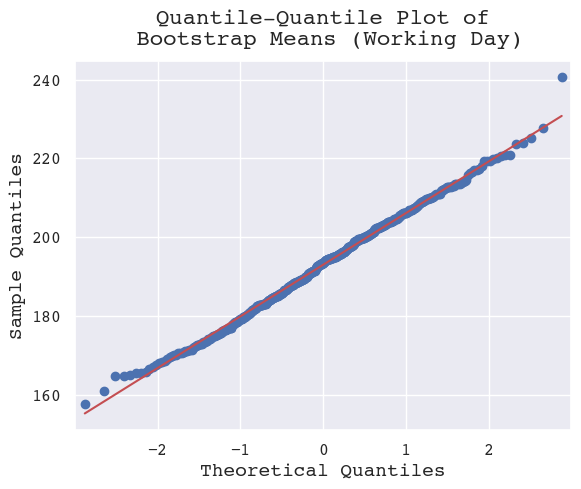

In [2053]:
# Create a Q-Q plot of bootstrap means for working day data.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(bootstrap_means_workingday), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Bootstrap Means (Working Day)", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [2054]:
# Perform a Shapiro-Wilk test on bootstrap means for working days and check for normal distribution
H0 = "Bootstrap mean data for working day follows normal distribution"
Ha = "Bootstrap mean data for working day doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(bootstrap_means_workingday).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.9976703524589539 0.9924846291542053
Fail to reject H0,  Bootstrap mean data for working day follows normal distribution


<Figure size 500x500 with 0 Axes>

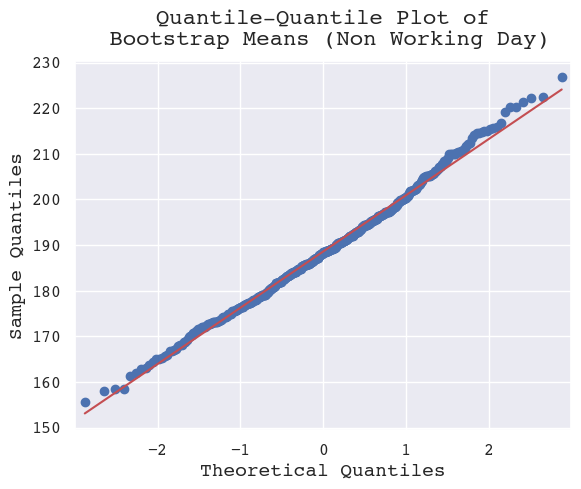

In [2055]:
# Create a Q-Q plot of bootstrap means for non working day data.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(bootstrap_means_non_workingday), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Bootstrap Means (Non Working Day)", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [2056]:
# Perform a Shapiro-Wilk test on bootstrap means for non working days and check for normal distribution
H0 = "Bootstrap mean data for non working day follows normal distribution"
Ha = "Bootstrap mean data for non working day doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(bootstrap_means_non_workingday).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.9914568066596985 0.28837835788726807
Fail to reject H0,  Bootstrap mean data for non working day follows normal distribution


In [2057]:
# Perform Levene's test to check if variances within groups are similar and make a hypothesis decision

H0 = "Variance within group is similar"
Ha = "Variance within group is not similar"

levene_stat, p_value = levene(
    bootstrap_means_workingday,
    bootstrap_means_non_workingday
)

print(test_stat, p_value)

if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.9914568066596985 0.053754641042284036
Fail to reject H0,  Variance within group is similar


In [1970]:
# Conducts a two-tailed hypothesis test using Student's T-distribution to determine if working days significantly impact the number of rented electric cycles.
#Step 1: Hypothesis Formulation
#Null Hypothesis (H0): 
H0 = "Working day has no effect on the number of electric cycles rented"

#Alternative Hypothesis (Ha): 
Ha = "Working day has effect on the number electric cycles rented"

#Step 2: Choice of Distribution
#Working day is categorical variable & number of cycles rented is numerical variable. In this testing Numerical variable is 
#compared with categorical variable hence Student's T-distribution will be used.
#As the independence between two variables needs to be determined hence one sample T-test independent will be used for hypothesis testing.

#Step 3: Directionality of the Test
#In this case, the alternative hypothesis does not specify the direction of the effect (whether it's an increase or decrease). 
#It simply states that an effect exists. Therefore, this is a two-tailed or two-sided hypothesis test.


#Step 4: Computation of p-value

t_stat, p_value = ttest_ind(bootstrap_means_workingday, bootstrap_means_non_workingday)

print(t_stat, p_value)

#Step 5: Hypothesis Testing
if p_value<alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

4.549761898427817 6.031019318313643e-06
Reject H0,  Working day has effect on the number electric cycles rented


No. of cycles rented similar or different in different seasons
- Test to be used is ANOVA. As numeric variable is to be compared with four categories
- Following ANOVA assumptions are to be validated
    - Data should follow normal distribution
    - There is equal variance within group
    - The data are independent.


In [1971]:
# Separate rentals by season categories

spring_rentals = df[df["season_cat"] == "Spring"]["count"]
summer_rentals = df[df["season_cat"] == "Summer"]["count"]
fall_rentals = df[df["season_cat"] == "Fall"]["count"]
winter_rentals = df[df["season_cat"] == "Winter"]["count"]

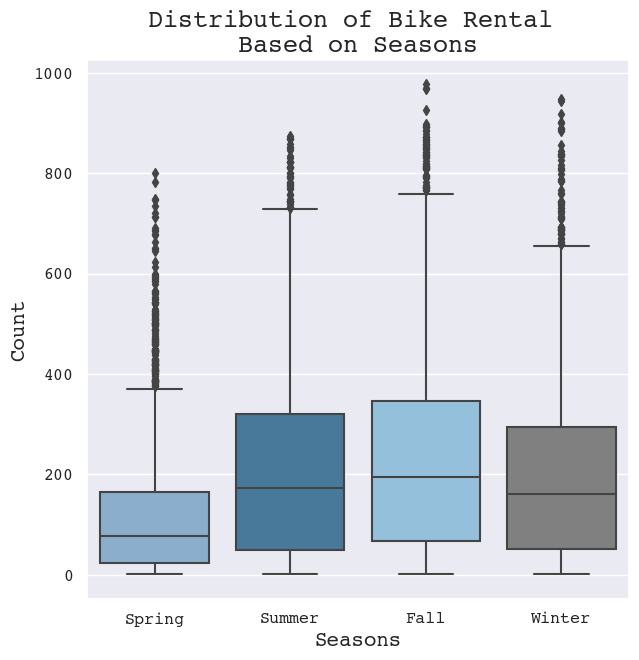

In [2076]:
fig=plt.figure(figsize=(7,7))
sns.set(style = 'darkgrid')
sns.boxplot(data=df, x="season_cat", y="count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Seasons", fontsize = 15, fontname='Courier')
plt.ylabel("Count", fontsize = 15, fontname='Courier')
plt.title("Distribution of Bike Rental \nBased on Seasons", fontsize = 18, fontname='Courier')
plt.show()

<Figure size 500x500 with 0 Axes>

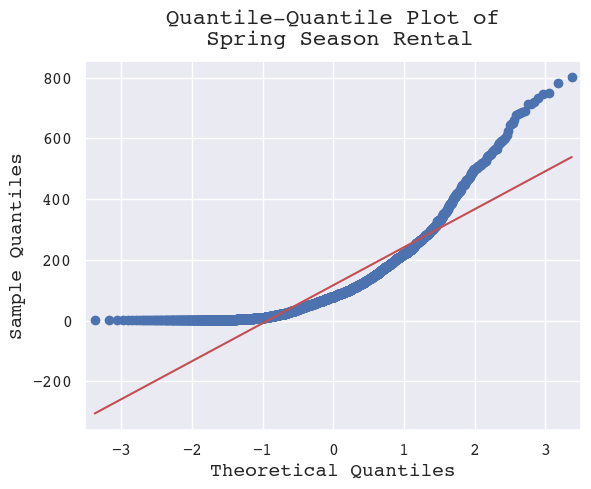

In [1972]:
# Create a QQ plot of spring season rentals data.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(spring_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Spring Season Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1973]:
# Test if spring season bike rentals follow a normal distribution and make a hypothesis decision
H0 = "Spring season's bike rental follows normal distribution"
Ha = "Spring season's bike rental doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(spring_rentals).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.8052335977554321 4.518664546135148e-15
Reject H0,  Spring season's bike rental doesn't follow a normal distribution


<Figure size 500x500 with 0 Axes>

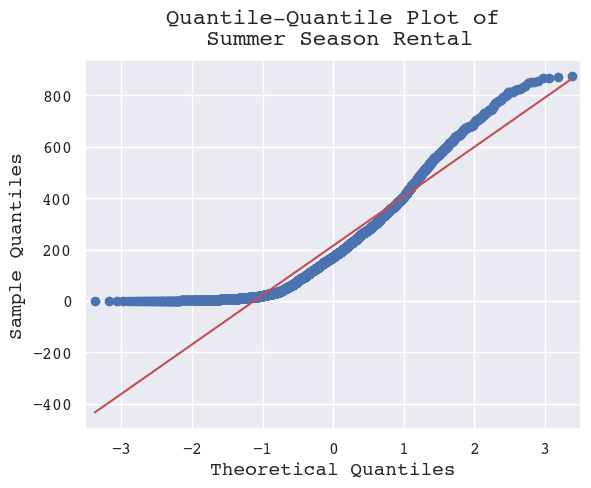

In [1974]:
# Create a QQ plot of summer season rentals data.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(summer_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Summer Season Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1975]:
# Test if summer season bike rentals follow a normal distribution and make a hypothesis decision
H0 = "Summer season's bike rental follows normal distribution"
Ha = "Summer season's bike rental doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(summer_rentals).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.9141311049461365 2.208525140545703e-09
Reject H0,  Summer season's bike rental doesn't follow a normal distribution


<Figure size 500x500 with 0 Axes>

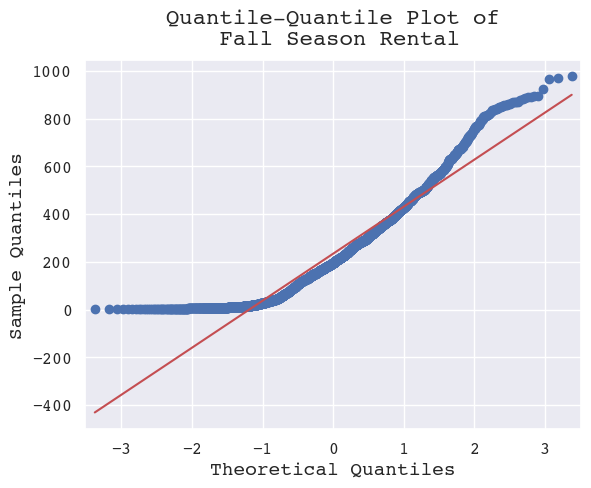

In [1976]:
# Create a QQ plot of fall season rentals data.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(fall_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Fall Season Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1977]:
# Test if fall season bike rentals follow a normal distribution and make a hypothesis decision
H0 = "Fall season's bike rental follows normal distribution"
Ha = "Fall season's bike rental doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(fall_rentals).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.9190933108329773 4.99767427442066e-09
Reject H0,  Fall season's bike rental doesn't follow a normal distribution


<Figure size 500x500 with 0 Axes>

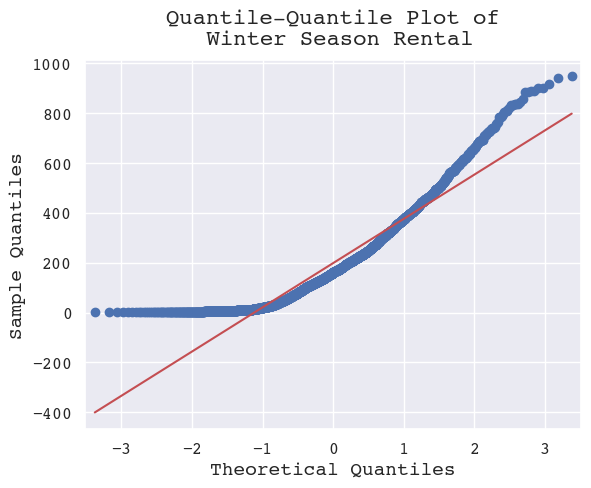

In [1978]:
# Create a QQ plot of winter season rentals data.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(winter_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Winter Season Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1979]:
# Test if winter season bike rentals follow a normal distribution and make a hypothesis decision
H0 = "Winter season's bike rental follows normal distribution"
Ha = "Winter season's bike rental doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(winter_rentals).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.8978051543235779 1.8256078593292813e-10
Reject H0,  Winter season's bike rental doesn't follow a normal distribution


In [2059]:
# Perform Levene's test to assess the similarity of group variances and make a hypothesis-based decision.
H0 = "Variance within group is similar"
Ha = "Variance within group is not similar"

levene_stat, p_value = levene(
    spring_rentals,
    summer_rentals,
    fall_rentals,
    winter_rentals
)

print(test_stat, p_value)

if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.9914568066596985 1.0147116860043298e-118
Reject H0,  Variance within group is not similar


In [1981]:
# Conducts Kruskal-Wallis test to analyze seasonal variations in rental cycles.

#Step 1: Hypotheses Formulation
#Null Hypothesis (H0): 
H0 = "The number of cycles rented remains similar across various seasons."
#Alternative Hypothesis (Ha): 
Ha = "The number of cycles rented varies across different seasons."

#Step 2: Choice of Distribution
#The Kruskal-Wallis test will be employed due to the absence of a normal data distribution and the presence of unequal variances within groups.

#Step 3: Directionality of the Test
#In this case, the alternative hypothesis does not specify the direction of the effect (whether it's an increase or decrease). 
#It simply states that an effect exists. Therefore, this is a two-tailed or two-sided hypothesis test.

#Step 4: Computation of p-value
f_stats, p_value = kruskal(
    spring_rentals,
    summer_rentals,
    fall_rentals,
    winter_rentals
)

print(f_stats, p_value)

#Step 5: Hypothesis Testing
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

699.6668548181988 2.479008372608633e-151
Reject H0,  The number of cycles rented varies across different seasons.


No. of cycles rented similar or different in different weather
- Test to be used is ANOVA. As numeric variable is to be compared with four categories
- Following ANOVA assumptions are to be validated
    - Data should follow normal distribution
    - There is equal variance within group
    - The data are independent.


In [1982]:
# Separate rentals data by weather categories.

clear_weather_rentals = df[df["weather_cat"] == "Clear"]["count"]
misty_weather_rentals = df[df["weather_cat"] == "Misty"]["count"]
light_prep_weather_rentals = df[df["weather_cat"] == "Light Precipitation"]["count"]
heavy_prep_weather_rentals = df[df["weather_cat"] == "Heavy Precipitation"]["count"]

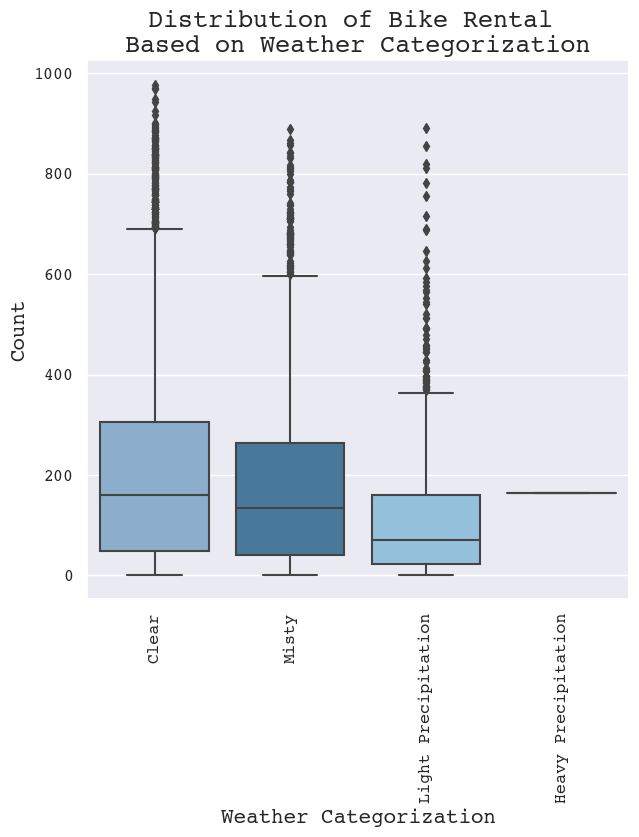

In [2079]:
fig=plt.figure(figsize=(7,7))
sns.set(style = 'darkgrid')
sns.boxplot(data=df, x="weather_cat", y="count", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Weather Categorization", fontsize = 15, fontname='Courier')
plt.ylabel("Count", fontsize = 15, fontname='Courier')
plt.title("Distribution of Bike Rental \nBased on Weather Categorization", fontsize = 18, fontname='Courier')
plt.show()

<Figure size 500x500 with 0 Axes>

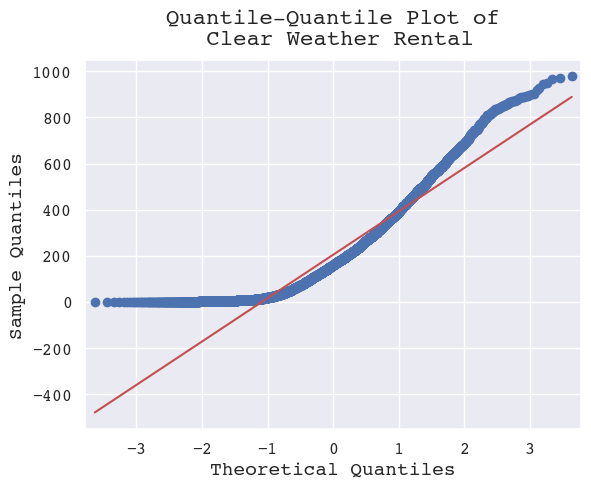

In [1983]:
# Create and display a Quantile-Quantile plot for clear weather rentals.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(clear_weather_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Clear Weather Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1984]:
# Checking if clear weather bike rental data follows a normal distribution using the Shapiro-Wilk test.
H0 = "Clear weather bike rental data follows normal distribution"
Ha = "Clear weather bike rental data doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(clear_weather_rentals).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.8930193781852722 9.234817771597292e-11
Reject H0,  Clear weather bike rental data doesn't follow a normal distribution


<Figure size 500x500 with 0 Axes>

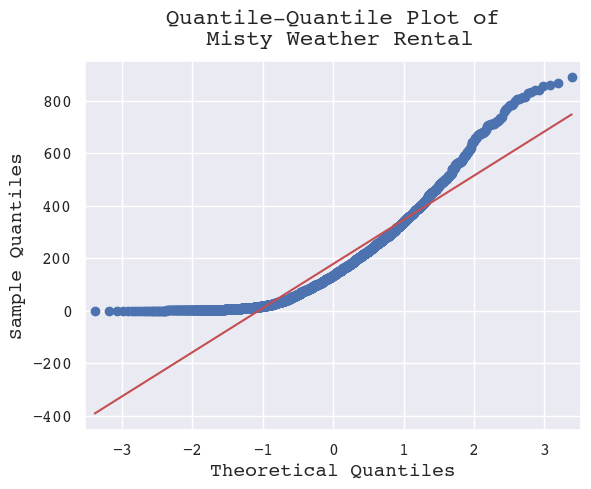

In [1985]:
# Create and display a Quantile-Quantile plot for misty weather rentals.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(misty_weather_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Misty Weather Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1986]:
# Checking if misty weather bike rental data follows a normal distribution using the Shapiro-Wilk test.

H0 = "Misty weather bike rental data follows normal distribution"
Ha = "Misty weather bike rental data doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(misty_weather_rentals).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.8858622312545776 3.455999028623147e-11
Reject H0,  Misty weather bike rental data doesn't follow a normal distribution


<Figure size 500x500 with 0 Axes>

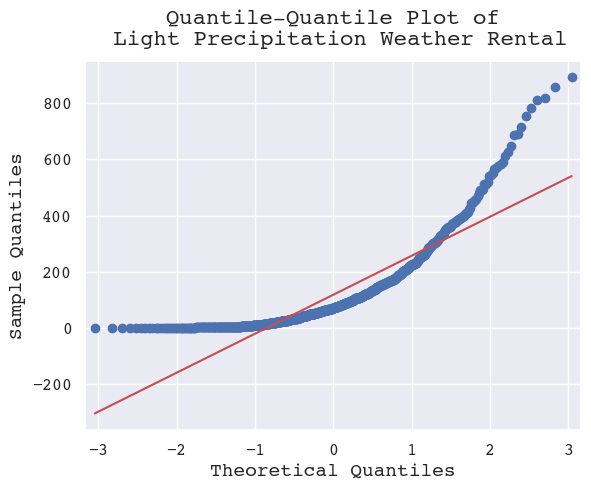

In [1987]:
# Create and display a Quantile-Quantile plot for light precipitation weather rentals.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(light_prep_weather_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Light Precipitation Weather Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1988]:
# Checking if light precipitation weather bike rental data follows a normal distribution using the Shapiro-Wilk test.

H0 = "Light precipitation weather bike rental data follows normal distribution"
Ha = "Light precipitation weather bike rental data doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(clear_weather_rentals).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.8955564498901367 1.3220181893647265e-10
Reject H0,  Light precipitation weather bike rental data doesn't follow a normal distribution


<Figure size 500x500 with 0 Axes>

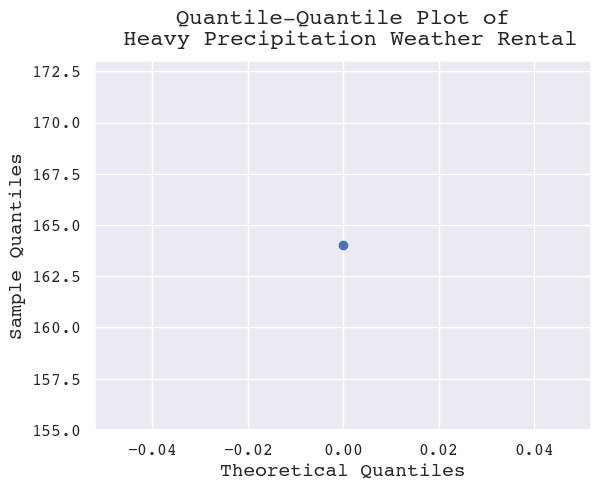

In [1989]:
# Create and display a Quantile-Quantile plot for heavy precipitation weather rentals.

fig=plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
qqplot(pd.Series(heavy_prep_weather_rentals), line="s")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontname='Courier')
plt.ylabel("Sample Quantiles", fontsize=14, fontname='Courier')
plt.title("Quantile-Quantile Plot of\n Heavy Precipitation Weather Rental", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [1990]:
# Checking if heavy precipitation weather bike rental data follows a normal distribution using the Shapiro-Wilk test.
H0 = "Heavy precipitation weather bike rental data follows normal distribution"
Ha = "Heavy precipitation weather bike rental data doesn't follow a normal distribution"

test_stat, p_value = shapiro(pd.Series(clear_weather_rentals).sample(200))

print(test_stat, p_value)
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.892892599105835 9.072091688988593e-11
Reject H0,  Heavy precipitation weather bike rental data doesn't follow a normal distribution


In [1991]:
# Check if the variance within groups is similar and make a decision based on the p-value.
H0 = "Variance within group is similar"
Ha = "Variance within group is not similar"

levene_stat, p_value = levene(
    clear_weather_rentals,
    misty_weather_rentals,
    light_prep_weather_rentals,
    heavy_prep_weather_rentals
)

print(test_stat, p_value)

if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

0.892892599105835 3.504937946833238e-35
Reject H0,  Variance within group is not similar


In [1992]:
#Kruskal-Wallis test to compare number of cycles rented across different weather conditions

#Step 1: Hypotheses Formulation
#Null Hypothesis (H0): 
H0 = "The number of cycles rented remains similar across various weather conditions."
#Alternative Hypothesis (Ha): 
Ha = "The number of cycles rented varies across different weather conditions."
#Step 2: Choice of Distribution
#The Kruskal-Wallis test will be employed due to the absence of a normal data distribution and the presence of unequal variances within groups.

#Step 3: Directionality of the Test
#In this case, the alternative hypothesis does not specify the direction of the effect (whether it's an increase or decrease). 
#It simply states that an effect exists. Therefore, this is a two-tailed or two-sided hypothesis test.

#Step 4: Computation of p-value
f_stats, p_value = kruskal(
    clear_weather_rentals,
    misty_weather_rentals,
    light_prep_weather_rentals,
    heavy_prep_weather_rentals
)

print(f_stats, p_value)

#Step 5: Hypothesis Testing
if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

205.00216514479087 3.501611300708679e-44
Reject H0,  The number of cycles rented varies across different weather conditions.


Weather is dependent on season
- Test to be used is chi2_contingency. As categorical variable is to be compared with categorical variable

In [2093]:
pd.crosstab(df["season_cat"], df["weather_cat"])

weather_cat,Clear,Heavy Precipitation,Light Precipitation,Misty
season_cat,,,,
Fall,1930,0,199,604
Spring,1759,1,211,715
Summer,1801,0,224,708
Winter,1702,0,225,807


In [1993]:
#Chi-squared test for independence of weather and season

#Step 1: Hypotheses Formulation
#Null Hypothesis (H0): 
H0 = "There is no association between weather and season"
#Alternative Hypothesis (Ha): 
Ha = "There is association between weather and season"

#Step 2: Choice of Distribution
#Categorical data is compared with categorical data and their independence needs to be tested.
#Hence chi2_contingency test is used

#Step 3: Directionality of the Test
#In this case, the alternative hypothesis does not specify the direction of the effect (whether it's an increase or decrease). 
#It simply states that an association exists. Therefore, this is a two-tailed or two-sided hypothesis test.

#Step 4: Computation of p-value
chi_stat, p_value, dof, exp_freq = chi2_contingency(pd.crosstab(df["season_cat"], df["weather_cat"]))

print(chi_stat, p_value, dof, exp_freq)

#Step 5: Hypothesis Testing
if p_value < alpha:
    print("Reject H0,", Ha)
else:
    print("Failed to reject H0,",  H0)

49.158655596893624 1.549925073686492e-07 9 [[1.80559765e+03 2.51056403e-01 2.15657450e+02 7.11493845e+02]
 [1.77454639e+03 2.46738931e-01 2.11948742e+02 6.99258130e+02]
 [1.80559765e+03 2.51056403e-01 2.15657450e+02 7.11493845e+02]
 [1.80625831e+03 2.51148264e-01 2.15736359e+02 7.11754180e+02]]
Reject H0, There is association between weather and season
